In [1]:
import requests
from PIL import Image
from transformers import Blip2Processor, Blip2ForConditionalGeneration
import torch
from google.colab import drive
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Load the model and processor
processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-6.7b-coco")
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-6.7b-coco", device_map="auto", torch_dtype=torch.float16)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/904 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/127k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/9.80G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/9.93G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/9.93G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/2.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

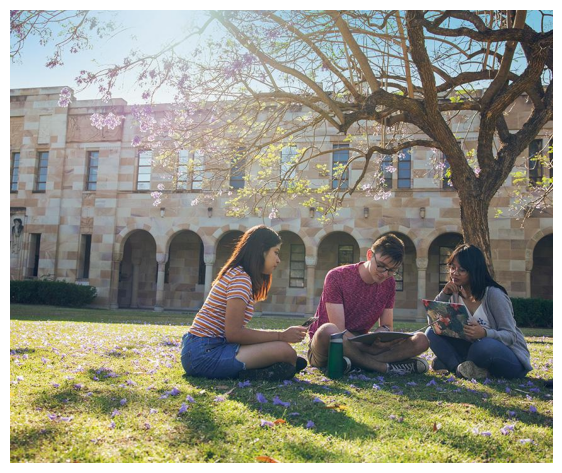

Both `max_new_tokens` (=50) and `max_length`(=51) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=50) and `max_length`(=51) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generated caption: three young people sitting on the grass reading a book



Both `max_new_tokens` (=50) and `max_length`(=51) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Q: What is the main subject of this image?
A: 




Both `max_new_tokens` (=50) and `max_length`(=51) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Q: How many people are in the image?
A:   three




Both `max_new_tokens` (=50) and `max_length`(=51) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Q: What is the setting of this image?
A:   a college campus?  a park?  a library?  a park?  a library?  a park?  a library?  a park?  a library?  a park?  a library?  a park? 



Both `max_new_tokens` (=50) and `max_length`(=51) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Q: Describe the mood or atmosphere of the scene.
A: 


Q: What activities might be happening in this image?
A: 




In [5]:
def load_image(image_path):
    return Image.open(image_path).convert('RGB')

def display_image(image):
    plt.figure(figsize=(7, 7))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def generate_caption(image):
    inputs = processor(image, return_tensors="pt").to(model.device)
    out = model.generate(**inputs, max_new_tokens=50)
    return processor.decode(out[0], skip_special_tokens=True)

def answer_question(image, question):
    inputs = processor(image, question, return_tensors="pt").to(model.device)
    out = model.generate(**inputs, max_new_tokens=50)
    return processor.decode(out[0], skip_special_tokens=True)

# Example usage
image_path = "/content/drive/MyDrive/uq-in-schools-card_0.jpg"

try:
    # Load and display the image
    image = load_image(image_path)
    display_image(image)

    # Generate caption
    caption = generate_caption(image)
    print(f"Generated caption: {caption}")

    # Answer questions about the image
    questions = [
        "What is the main subject of this image?",
        "How many people are in the image?",
        "What is the setting of this image?",
        "Describe the mood or atmosphere of the scene.",
        "What activities might be happening in this image?"
    ]

    for question in questions:
        answer = answer_question(image, question)
        print(f"Q: {question}")
        print(f"A: {answer}\n")

except Exception as e:
    print(f"An error occurred: {str(e)}")

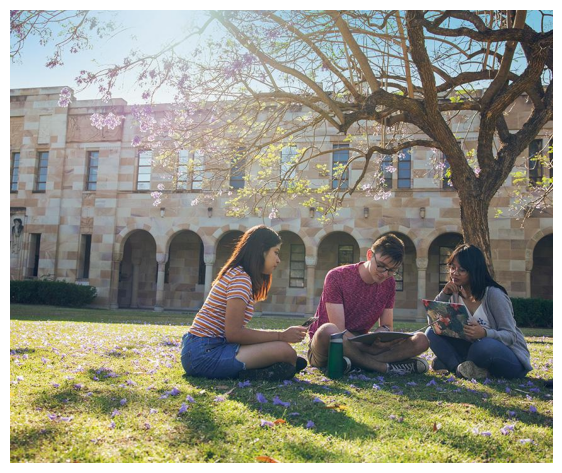

Both `max_new_tokens` (=50) and `max_length`(=51) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=50) and `max_length`(=51) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Generated caption: three young people sitting on the grass reading a book



Both `max_new_tokens` (=50) and `max_length`(=51) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Q: What is in this image?
A:  three people sitting on the grass




Both `max_new_tokens` (=50) and `max_length`(=51) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Q: How many people are in the image?
A:   three


Q: What is the setting of this image?
A:   a college campus?  a park?  a library?  a park?  a library?  a park?  a library?  a park?  a library?  a park?  a library?  a park? 



In [4]:
def load_image(image_path):
    return Image.open(image_path).convert('RGB')

def display_image(image):
    plt.figure(figsize=(7, 7))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def generate_caption(image):
    inputs = processor(image, return_tensors="pt").to(model.device)
    out = model.generate(**inputs, max_new_tokens=50)
    return processor.decode(out[0], skip_special_tokens=True)

def answer_question(image, question):
    inputs = processor(image, question, return_tensors="pt").to(model.device)
    out = model.generate(**inputs, max_new_tokens=50)
    return processor.decode(out[0], skip_special_tokens=True)

# Example usage
image_path = "/content/drive/MyDrive/uq-in-schools-card_0.jpg"

try:
    # Load and display the image
    image = load_image(image_path)
    display_image(image)

    # Generate caption
    caption = generate_caption(image)
    print(f"Generated caption: {caption}")

    # Answer questions about the image
    questions = [
        "What is in this image?",
        "How many people are in the image?",
        "What is the setting of this image?"
    ]

    for question in questions:
        answer = answer_question(image, question)
        print(f"Q: {question}\nA: {answer}\n")

except Exception as e:
    print(f"An error occurred: {str(e)}")